# Instrument Response
We need to sort out how exactly to calculate the instrument response function. We want to look at the Hi-C 193 and the AIA 193 channels, look at their differences,  and then use the AIA 171 channel to approximate the Hi-C 171 channel.

In [23]:
import numpy as np
from scipy.interpolate import splrep,splev
import scipy.signal
import matplotlib.pyplot as plt
import astropy.units as u
from synthesizAR.instruments import InstrumentSDOAIA
from astropy.coordinates import SkyCoord

%matplotlib inline

In [3]:
aia = InstrumentSDOAIA([0,1]*u.s,SkyCoord(lon=0*u.deg,lat=0*u.deg,frame='heliographic_stonyhurst'))

In [6]:
with open('HiC_193.ins','r') as f:
    lines = f.readlines()
    n = int(lines[0])
    hi_c_193_wvl = np.zeros((n,))
    hi_c_193_resp = np.zeros((n,))
    for i,l in enumerate(lines[1:n+1]):
        hi_c_193_wvl[i] = l.strip().split()[0]
        hi_c_193_resp[i] = l.strip().split()[1]

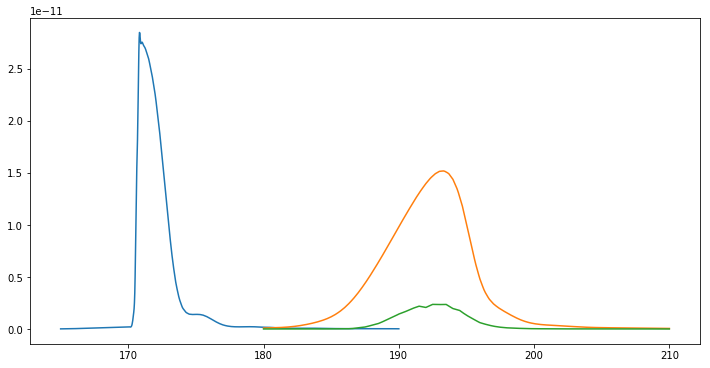

In [25]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()
w = np.linspace(165,190,1000)
aia_171_resp = splev(w,aia.channels[2]['wavelength_response_spline'])
ax.plot(w,aia_171_resp,label='AIA 171')
aia_193_resp = splev(hi_c_193_wvl,aia.channels[3]['wavelength_response_spline'])
ax.plot(hi_c_193_wvl,aia_193_resp,label='AIA 193')
ax.plot(hi_c_193_wvl,hi_c_193_resp,label='Hi-C 193')
#ax.set_yscale('log')

In [33]:
aia_to_hi_c_filter,aia_to_hi_c_remainder = scipy.signal.deconvolve(hi_c_193_resp,aia_193_resp,)

In [38]:
hi_c_171_resp = scipy.signal.convolve(aia_171_resp,aia_to_hi_c_filter) #+ aia_to_hi_c_remainder 

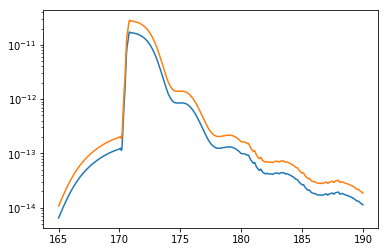

In [41]:
plt.plot(w,110*hi_c_171_resp)
plt.plot(w,aia_171_resp)
plt.yscale('log')

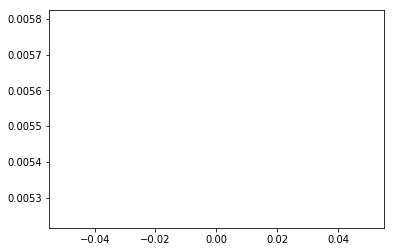

In [42]:
plt.plot(aia_to_hi_c_filter)

In [43]:
aia_to_hi_c_filter

array([0.00551974])